In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
sns.set_context('talk')
sns.set_style('ticks')

In [3]:
files=os.listdir()

In [4]:
files

['11019977.hobo',
 'MSL.ipynb',
 'Experiment.hobo',
 'Water.csv',
 '.ipynb_checkpoints',
 'Air.csv']

In [5]:
air_data = pd.read_csv(files[5],skiprows=2)

In [6]:
water_data = pd.read_csv(files[3],skiprows=2)

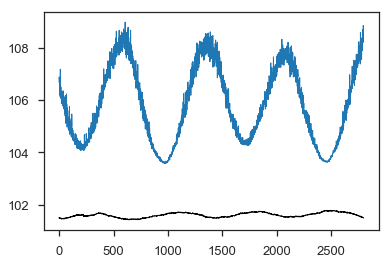

In [7]:
plt.plot(air_data.get_values()[100:2900,2],lw=1,color='k')
plt.plot(water_data.get_values()[100:2900,2],lw=1)


In [8]:
water_data.get_values()[50,2]-air_data.get_values()[50,2]

6.086000000000013

In [9]:
#pressure = ro g h
pressure = (water_data.get_values()[:4300,2]-air_data.get_values()[:4300,2]) * 10**3 #newtons per sq meter
ro = 1.0240 #g/cm^3 or kg/l at 20 C (1.0273 at 0 C)
g = 9.81 #m/s^2
tidal_depth=pressure/(ro*g)/1000 #meters

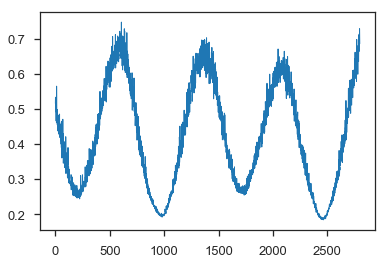

In [10]:
plt.plot(tidal_depth[100:2900],lw=1)


In [11]:
#control points calibrated with ruler and time stamp
control_points=[]
control_points.append([5,0.306])
control_points.append([87,0.650])
control_points.append([2931,0.146])

#6/24
#4:48 pm - 30.6cm
#6:10 pm - 65.0cm

#6/26   5:34 pm - 14.6cm


In [12]:
air_data.get_values()[2931,1]

'07/02/17 03:52:00 PM'

In [13]:
np.mean(tidal_depth[100:2900])

0.42032607403387456

In [14]:
#HAE was -39.29026
#MTL is -38.86993392596613
#highest coral is 1.4099339259661292

In [15]:
MTL = -39.29026+0.42032607403387456
highest_coral_hae = -37.46
cliff_sand = -36.31
wrack_line = -36.45
B814_coral = -37.12

In [16]:
highest_coral_hae - MTL

1.4099339259661292

In [17]:
cliff_sand - MTL

2.559933925966128

In [18]:
wrack_line - MTL

2.419933925966127

In [19]:
B814_coral - MTL

1.7499339259661326

In [20]:
-36.55 - MTL

2.319933925966133

(-10, 3000)

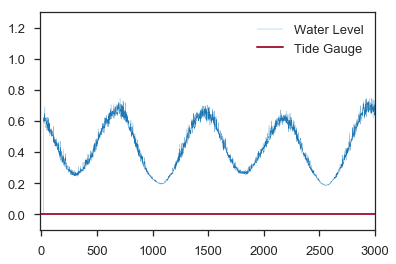

In [26]:
plt.plot(tidal_depth,lw=.25,label='Water Level')
#plt.plot([0,4300],[np.nanmean(tidal_depth[1:]),np.nanmean(tidal_depth[1:])],lw=2,color=(.25,.25,.25),
#         label='Mean Water Level')
plt.plot([0,4300],[0,0],lw=2,color=(.65,.15,.25),label='Tide Gauge')
#for i in range(len(control_points)):
#    plt.plot([control_points[i][0]],control_points[i][1],'.',markersize=20,color=(.65,.15,.25),label='Calibration '+str(i))

#plt.plot([0,2100],[1.003,1.003],lw=2,color=(.25,.65,.15),label='Point')
plt.legend(loc='best')
plt.gca().set_ylim([-.1,1.3])
plt.gca().set_xlim([-10,3000])


In [27]:
cost=[]
adjusted_ro = 1.0240
ro_list=[]

for i in range(1000):
    #pressure = ro g h
    pressure = (water_data.get_values()[:4300,2]-air_data.get_values()[:4300,2]) * 10**3 #newtons per sq meter
    adjusted_ro = 1.0240+np.random.normal(0,.000001) #g/cm^3 or kg/l at 20 C (1.0273 at 0 C)
    ro_list.append(adjusted_ro)
    g = 9.81 #m/s^2
    new_tidal_depth=pressure/(adjusted_ro*g)/1000 #meters

    new_cost=np.array(np.sum(np.abs(np.array(control_points)[:,1]
                                    -new_tidal_depth[np.array(control_points)[:,0].astype(int)])))
    cost.append(new_cost)
    
cost=np.array(cost)


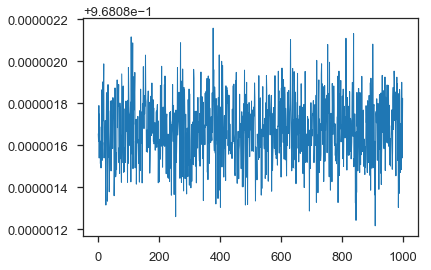

In [28]:
plt.plot(cost,lw=1)

In [29]:
best=np.argsort(cost)[0].astype(int)
best_ro=ro_list[best]
best_tidal_depth=pressure/(adjusted_ro*g)/1000

In [38]:
tidal_depth=np.array(tidal_depth).astype(float)
best_tidal_depth=np.array(best_tidal_depth).astype(float)


In [37]:
np.nanmean(tidal_depth[1:])

0.4207511708880036

Text(0.5,0,'Time')

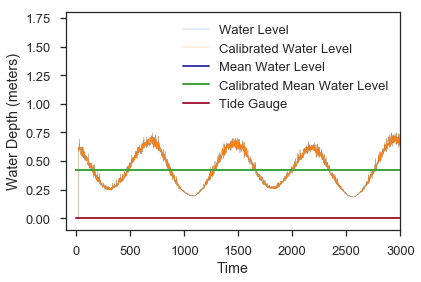

In [41]:
plt.plot(tidal_depth,lw=.25,label='Water Level')
plt.plot(best_tidal_depth,lw=.25,label='Calibrated Water Level')
plt.plot([0,4300],[np.nanmean(tidal_depth[1:]),np.nanmean(tidal_depth[1:])],lw=2,color=(.25,.25,.65),
         label='Mean Water Level')
plt.plot([0,4300],[np.nanmean(best_tidal_depth[1:]),np.nanmean(best_tidal_depth[1:])],lw=2,color=(.25,.65,.25),
         label='Calibrated Mean Water Level')
plt.plot([0,4300],[0,0],lw=2,color=(.65,.15,.25),label='Tide Gauge')
# for i in range(len(control_points)):
#     plt.plot([control_points[i][0]],control_points[i][1],'.',markersize=20,color=(.65,.15,.25))

#plt.plot([0,2100],[1.003,1.003],lw=2,color=(.25,.65,.15),label='Point')
plt.legend(loc='best')
plt.gca().set_ylim([-0.1,1.8])
plt.gca().set_xlim([-100,3000])
plt.gca().set_ylabel('Water Depth (meters)')
plt.gca().set_xlabel('Time')


In [53]:
tidal_depth=tidal_depth[20:3000]

In [144]:
np.nanmean(best_tidal_depth)

0.49445481183896445

In [42]:
best_ro

1.0240029880680976

In [55]:
np.argmin(tidal_depth[:700])

303

In [57]:
np.argmin(tidal_depth[700:1400])+700

1061

758

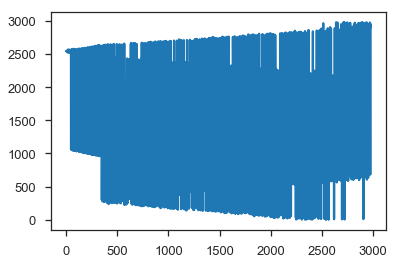

In [54]:
plt.plot(np.argsort(tidal_depth))

In [75]:
control_points[0,1]-tidal_depth[control_points[0,0]]

TypeError: list indices must be integers or slices, not tuple

/Users/bdyer/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/bdyer/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


NameError: name 'means' is not defined

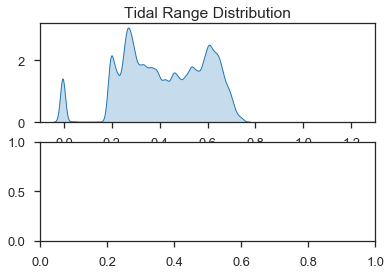

In [43]:
fig=plt.figure()
plt.subplot(211)
sns.kdeplot(tidal_depth,bw=.01,gridsize=1000,lw=1,shade=True)
plt.gca().set_xlim(-.1,1.3)
plt.gca().set_title('Tidal Range Distribution')
plt.subplot(212)
sns.kdeplot(np.array(means),bw=.01,lw=1,gridsize=1000,shade=True)
plt.gca().set_xlim(-.1,1.3)
plt.gca().set_title('Bootstrapped Tidal Range Mean')
fig.tight_layout()


In [42]:
np.percentile(tidal_depth,50)

0.5373582441386336

In [72]:
means=[]
for i in range(100000):
    start=np.random.uniform(0,2000,1).astype(int)[0]
    end=start+np.random.normal(750,20,1).astype(int)[0]
    means.append(np.nanmean(tidal_depth[start:end]))

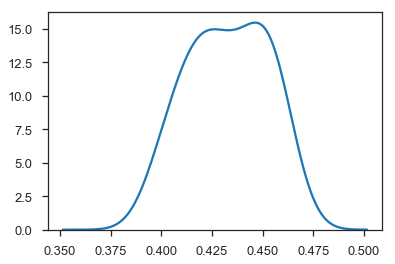

In [74]:
sns.kdeplot(np.array(means),bw=.01)

In [75]:
np.ptp(means)

0.090328948267962

In [65]:
np.nanmean(tidal_depth[1:])
#100.3 cm is the tide guage to GPS point
#-40 meters is the GAI
#SL is 39.73

0.5459272387045548

In [108]:
means=[np.nanmean(tidal_depth[1:x]) for x in range(len(tidal_depth))]

/Users/bdyer/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/bdyer/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


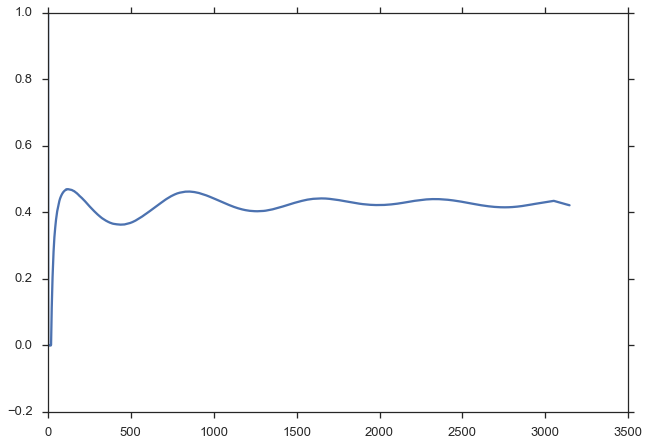

In [109]:
plt.plot(means)

In [113]:
files=os.listdir('/Volumes/G-DRIVE mobile USB-C/GESLA_DATA/public')

In [126]:
[files.index(s) for s in files if 'caicos' in s]

[1099, 1101]

In [136]:
caicos_df=pd.read_csv('/Volumes/G-DRIVE mobile USB-C/GESLA_DATA/public/'+files[1099],skiprows=31,delimiter=' ')

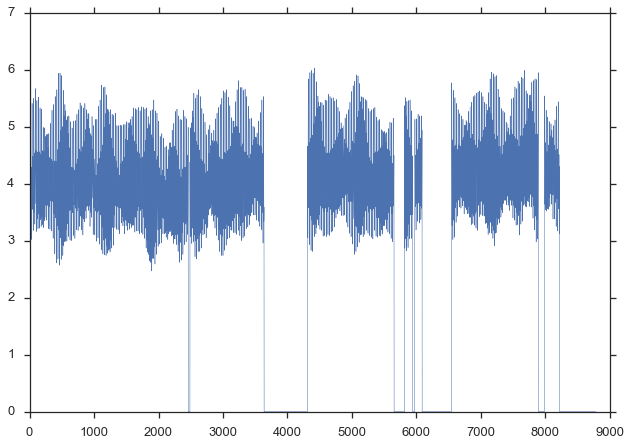

In [151]:
plt.plot(caicos_df['Unnamed: 14'],lw=.5)
#plt.gca().set_xlim([0,1000])

In [163]:
filtered=np.array(caicos_df['Unnamed: 14'])
filtered[filtered<.1]=np.nan
means2=[np.nanmean(filtered[:x]) for x in range(8000)]

/Users/bdyer/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


(0, 1000)

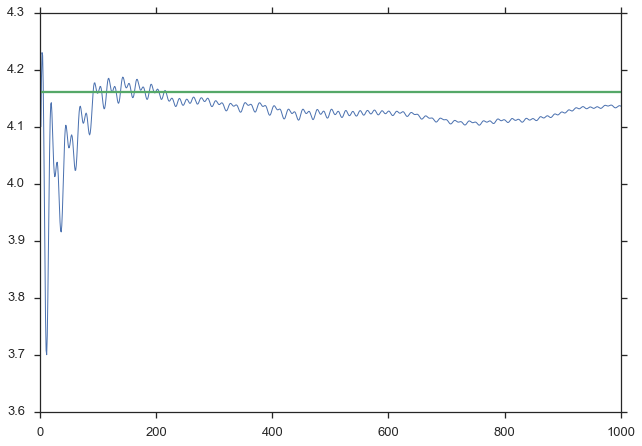

In [166]:
plt.plot(means2,lw=1)
plt.plot([0,2000],[means2[-1],means2[-1]])
plt.gca().set_xlim([0,1000])

In [158]:
filtered=np.array(caicos_df['Unnamed: 14'])

In [73]:
x=np.linspace(0,100,1000)
b=0
m=1
profile = m*x+b

In [74]:
SL = 400
profile2 = np.copy(profile)
locations = np.round(np.random.normal(0,40,20000)).astype(int)
for loc in locations:
    profile2[SL+loc] = profile2[SL+loc]+.1

In [75]:
SL_list = np.arange(100,400)
profile3 = np.copy(profile)
locations = np.round(np.random.normal(0,40,20000)).astype(int)
for SLval in SL_list:
    for loc in locations:
        profile3[SLval+loc] = profile3[SLval+loc]+.1/80

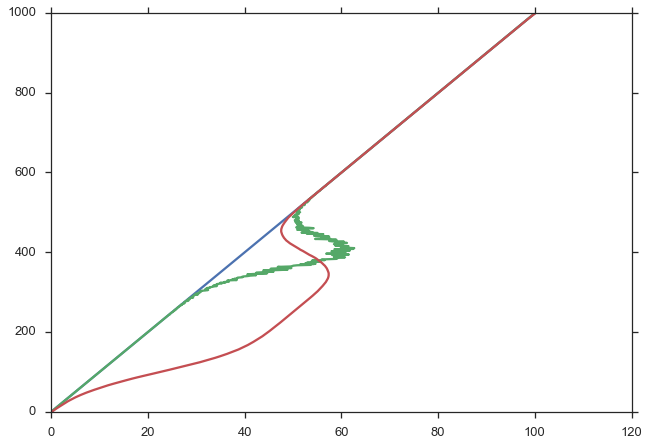

In [76]:
plt.plot(profile,np.arange(1000),)
plt.plot(profile2,np.arange(1000),)
plt.plot(profile3,np.arange(1000),)


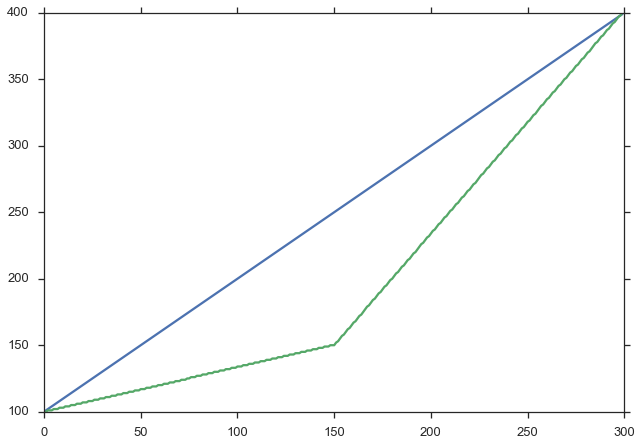

In [96]:
plt.plot(SL_list)
SL_list_2 = np.round([np.linspace(100,150,150),np.linspace(150,400,150)]).ravel().astype(int)
plt.plot(SL_list_2)

In [97]:
SL_list_2=np.round(SL_list_2).astype(int)
profile4 = np.copy(profile)
locations = np.round(np.random.normal(0,40,20000)).astype(int)
for SLval in SL_list_2:
    for loc in locations:
        profile4[SLval+loc] = profile4[SLval+loc]+.1/80

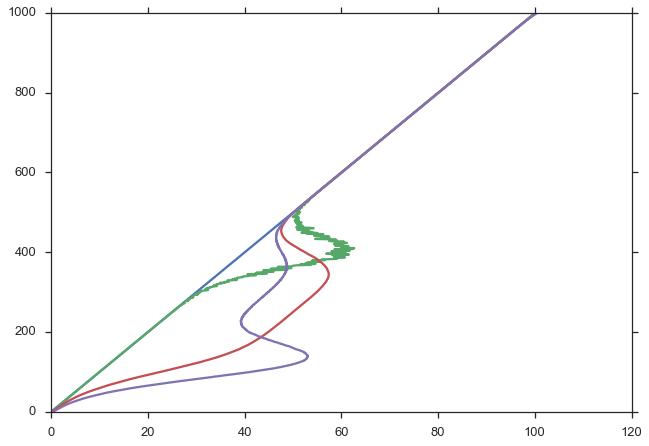

In [98]:
plt.plot(profile,np.arange(1000),)
plt.plot(profile2,np.arange(1000),)
plt.plot(profile3,np.arange(1000),)
plt.plot(profile4,np.arange(1000),)


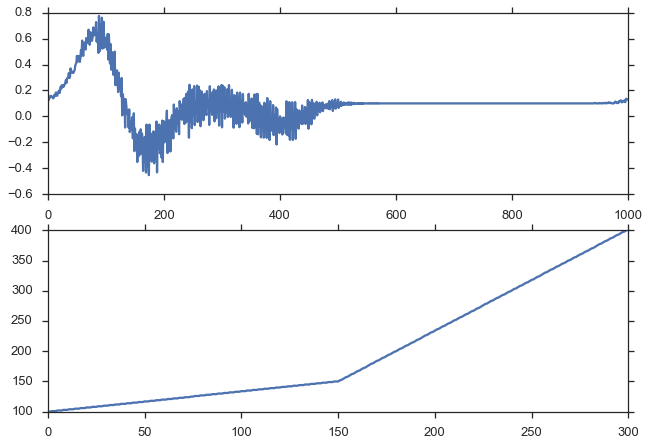

In [106]:
plt.subplot(211)
plt.plot(np.diff(profile4)/np.diff(np.arange(1000)))
plt.subplot(212)
plt.plot(SL_list_2)